## 四、accuracy 准确度

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()   #加载手写数字数据集
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
some_digit  = X[888]

In [7]:
y[888]

7

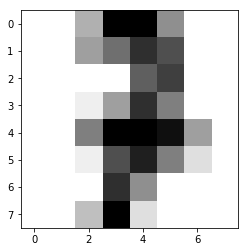

In [8]:
some_digit_image = some_digit.reshape(8, 8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()

def train_test_split(x, y, ratio = 0.2, seed = None):
    assert x.shape[0] == y.shape[0]
    assert 0.0 <= ratio <= 1.0
    if seed:
        np.random.seed(seed)
    shuffie_indexes = np.random.permutation(len(x))
    test_size = int(len(x) * ratio)
    x_test = x[shuffie_indexes[:test_size]]
    y_test = y[shuffie_indexes[:test_size]]
    x_train = x[shuffie_indexes[test_size:]]
    y_train = y[shuffie_indexes[test_size:]]    
    return x_train, y_train, x_test, y_test

In [9]:
%run somelib/KNNFunction/split

In [10]:
x_train, y_train, x_test, y_test = train_test_split(X, y)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kNN_Classifier = KNeighborsClassifier(n_neighbors = 6)
kNN_Classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [12]:
predict_result = kNN_Classifier.predict(x_test)

In [13]:
right_ratio = sum(predict_result == y_test) / len(x_test)
right_ratio

0.9832869080779945

In [14]:
import math
from collections import Counter
def kNN_classify(x, k, X_train, y_train):
    distances = [math.sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
    nearest = np.argsort(distances)
    topK_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(topK_y)
    return votes.most_common(1)[0][0]

### accuracy_score函数封装

In [15]:
%run somelib/KNNFunction/accuracy

In [16]:
accuracy_score(y_test, predict_result)

0.9832869080779945

In [17]:
%run somelib/KNNFunction/knn.py

In [18]:
kNNClassifier( k=6)

KNN (k = 6)

### sklearn 中的accuracy score

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kNN_Classifier1 = KNeighborsClassifier(n_neighbors=6)
kNN_Classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [28]:
y_predict = kNN_Classifier1.predict(X_test)

'uniform'

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_predict)

0.9851851851851852